# Project 3: Investigate No-Show Appointment Dataset

## Introduction:
Investigation of a dataset containing information from one hundred thousand medical appointments in Brazil. The dataset contains a number of characteristics about the patients and is focused on determining possible reasons why patients show up or not for their appointments.

## Questions posed:
 - what feature has a positive impact on no-show?
 - what months have greater no-show appointments and are there reasons for it?
 - What hospital locations have the highest no show?
 - What is the no show rate of patients whose appointment and schedule dates are the same and of patients that are not the same?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset
df = pd.read_csv('noshowapp.csv')

### Assessing the dataset

In [3]:
# Checking for number of rows and columns
df.shape

(110527, 14)

In [4]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [5]:
# Getting the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Checking data types of columns 
type(df['No-show'][0])

str

In [7]:
# checking for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

### Cleaning the dataset
***

In [3]:
# converting all column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
# Assessing the age column
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [13]:
# dropping rows with ages of negative values
df.drop(df[df['age'] <= 0].index, inplace = True)

In [14]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

In [15]:
df['age'].min()

1

In [16]:
# converting to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.columns


Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [17]:
# Converting SheduledDay and AppointmentDay to integers
df['int_scheduled_day'] = df['scheduledday'].dt.year * 1000 + df['scheduledday'].dt.month * 100 + df['scheduledday'].dt.day
df['int_appointment_day'] = df['appointmentday'].dt.year * 1000 + df['appointmentday'].dt.month * 100 + df['appointmentday'].dt.day
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,int_scheduled_day,int_appointment_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016429,2016429
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016429,2016429


In [18]:
# Extracting date from datetime
df['scheduled_day'] = df['scheduledday'].dt.date
df['appointment_day'] = df['appointmentday'].dt.date
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show',
       'int_scheduled_day', 'int_appointment_day', 'scheduled_day',
       'appointment_day'],
      dtype='object')

In [19]:
# Drop columns scheduledday, appointmentday, handcap and patientid
df = df.drop(['scheduledday', 'appointmentday', 'handcap', 'patientid'], axis= 1)
df.columns

Index(['appointmentid', 'gender', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'sms_received', 'no-show',
       'int_scheduled_day', 'int_appointment_day', 'scheduled_day',
       'appointment_day'],
      dtype='object')

### Exploring the dataset
***

In [20]:
# checking for the no-show counts
df['no-show'].value_counts()

No     85307
Yes    21680
Name: no-show, dtype: int64

In [21]:
# Getting data based on whether patients received sms or not
df_sms = df[df['sms_received'] >= 1]
df_nosms = df[df['sms_received'] < 1]
df_sms.head(2)

,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no-show,int_scheduled_day,int_appointment_day,scheduled_day,appointment_day
11,5620163,M,29,NOVA PALESTINA,0,0,0,0,1,Yes,2016426,2016429,2016-04-26,2016-04-29
15,5620206,F,15,NOVA PALESTINA,0,0,0,0,1,No,2016426,2016429,2016-04-26,2016-04-29


In [22]:
# Checking the number of patients that did/did not show based on sms received/not received 
received_sms = df_sms['no-show'].value_counts()
received_nosms = df_nosms['no-show'].value_counts()

In [23]:
# Converting received_sms and received_nosms to DataFrame
received_sms = received_sms.rename_axis('No').reset_index(name ='Yes')
received_nosms = received_nosms.rename_axis('No').reset_index(name ='Yes')
received_sms

,No,Yes
0,No,25017
1,Yes,9568


In [24]:
# Converting returned the series into dataframe
received_sms = received_sms.transpose().set_index(pd.Index([0, 1]))
received_nosms = received_nosms.transpose().set_index(pd.Index([0, 1]))
received_sms

,0,1
0,No,Yes
1,25017,9568


In [25]:
received_sms.drop(0, axis= 0, inplace = True)
received_nosms.drop(0, axis= 0, inplace = True)
received_nosms

,0,1
1,60290,12112


In [26]:
# Renaming the columns
received_sms.columns = ['smsNo', 'smsYes']
received_nosms.columns = ['nosms-No', 'nosms-Yes']
received_sms

,smsNo,smsYes
1,25017,9568


In [27]:
df_sms_combined = pd.concat([received_sms, received_nosms], axis= 1, join= 'outer')
df_sms_combined.columns

Index(['smsNo', 'smsYes', 'nosms-No', 'nosms-Yes'], dtype='object')

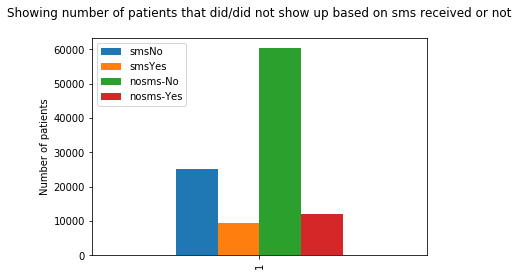

In [30]:
df_sms_combined.plot.bar()
plt.title('Showing number of patients that did/did not show up based on sms received or not\n')
plt.ylabel('Number of patients')
plt.legend(loc='upper left')

From the plot above, it can be deduced that sending sms to patients does not necessarily play a major role in determining whether patients will show for their appointment or not.

### Deductions from the plot includes:
 - The total number of patients sms was sent is less than that of those sms was not sent to
 - Regardless of sms sent or not, a larger number of patients showed up for their appointment
 - The number of patients that did not receive sms and did not show for their appointment is slightly larger than the number of  - patients that was sent sms and did not show up for their appointment

In [25]:
df_comparison = np.where(df['int_scheduled_day'] == df['int_appointment_day'], True, False)
df['compare_date'] = df_comparison

In [26]:
same_date = df.query('compare_date == True')
diff_date = df.query('compare_date == False')

Text(0.5, 0, 'No-show')

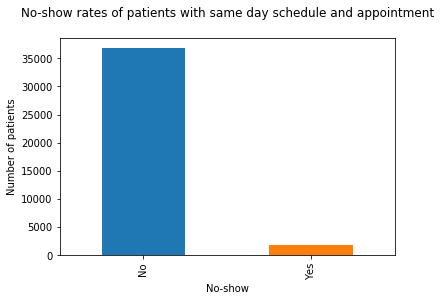

In [27]:
same_date['no-show'].value_counts().plot.bar()
plt.title('No-show rates of patients with same day schedule and appointment\n')
plt.ylabel('Number of patients')
plt.xlabel('No-show')

Text(0.5, 0, 'No-show')

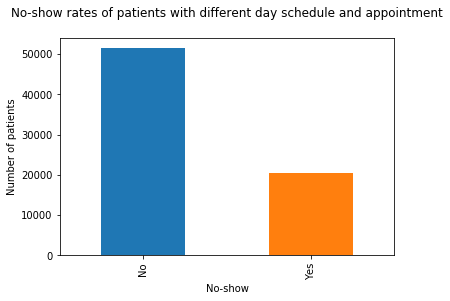

In [28]:
diff_date['no-show'].value_counts().plot.bar()
plt.title('No-show rates of patients with different day schedule and appointment\n')
plt.ylabel('Number of patients')
plt.xlabel('No-show')

### Deductions from the plot:
 - A lesser number of patients whose schedule and appointment dates are the same did not show for ther appointments compared to patients whose scheduled and appointment dates are on different dates.
 - It shows that there is a higher probability of patients showing up for their appointments if it was scheduled that same day.

In [6]:
# Assigning values to column no-show_category
df['no_show_category'] = np.where(df['no-show'] == 'No', 0, 1)

In [20]:
df['no_show_category'].unique()

array([0, 1], dtype=int64)

In [44]:
df_ailment = df.groupby(['hipertension', 'diabetes', 'alcoholism'])

In [45]:
df_ailment['no-show'].describe()

count unique top   freq
hipertension diabetes alcoholism                         
0            0        0           81772      2  No  64573
                      1            1957      2  No   1537
             1        0            1381      2  No   1105
                      1              76      2  No     63
1            0        0           14244      2  No  11811
                      1            1071      2  No    873
             1        0            6230      2  No   5135
                      1             256      2  No    210

In [47]:
df_ailment['no_show_category'].mean()

hipertension  diabetes  alcoholism
0             0         0             0.210329
                        1             0.214614
              1         0             0.199855
                        1             0.171053
1             0         0             0.170809
                        1             0.184874
              1         0             0.175762
                        1             0.179688
Name: no_show_category, dtype: float64

### Deductions:
 - The largest number those who booked appointments were patients who had no existing ailment, probably coming for checkups.
 - Among patients who has existing ailments(hipertension, diabetes, alcoholism) more of them showed up for their appointments.
 - It could be seen that in all groups, there were patients who did not show up for their appointments.
 - Though the highest average of patients who did not show up for their appointment were alcoholic patients and the least average were patients with hipertension.

In [7]:
# Putting column age into age groups
groups = ['Child', 'Young', 'Middle age', 'Aged', 'Old']
age_levels = [1, 11, 41, 61, 81, 116 ]
df['age_groups'] = pd.cut(df['age'], age_levels, labels= groups)

In [24]:
df.head()

,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no-show,int_scheduled_day,int_appointment_day,scheduled_day,appointment_day,no_show_category,age_groups
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,No,2016429,2016429,2016-04-29,2016-04-29,0,Aged
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,No,2016429,2016429,2016-04-29,2016-04-29,0,Middle age
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,No,2016429,2016429,2016-04-29,2016-04-29,0,Aged
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,2016429,2016429,2016-04-29,2016-04-29,0,Child
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,No,2016429,2016429,2016-04-29,2016-04-29,0,Middle age


In [16]:
df1= df.groupby('age_groups', as_index= True)['no_show_category'].mean()
df1

age_groups
Child         0.210940
Young         0.237496
Middle age    0.182293
Aged          0.149991
Old           0.167907
Name: no_show_category, dtype: float64

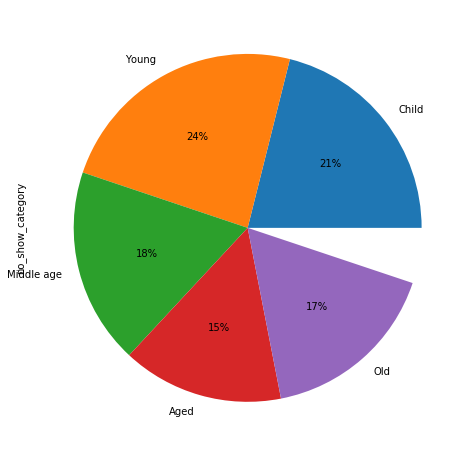

In [35]:
df1.plot(kind= 'pie', y= 'Age groups', autopct='%.0f%%', figsize= (15,8))

### Deductions:
 - Young people within the ages of 11 and 40 have the highest average of patients that did not show up for their appointments while the aged within ages 61 to 80 have the lowest average of patients that did not show up for their appointments.

In [51]:
df.groupby('scholarship', as_index= False)['no_show_category'].describe()

count  0    96178.000000
       1    10809.000000
mean   0        0.198684
       1        0.237857
std    0        0.399011
       1        0.425791
min    0        0.000000
       1        0.000000
25%    0        0.000000
       1        0.000000
50%    0        0.000000
       1        0.000000
75%    0        0.000000
       1        0.000000
max    0        1.000000
       1        1.000000
dtype: float64

In [58]:
df.groupby('scholarship', as_index= False)['no-show'].apply(pd.value_counts)

,No,Yes
0,77069,19109
1,8238,2571


In [24]:
# Creating a function for getting no-show proportion for each gender
length = len(df['no_show_category'])
def no_show_prop(x,y):
    if (x == 'F' and y < 1) or (x == 'M' and y < 1):
        z = y+1 /length
        return z
    else:
        z = y/length
        return z

In [25]:
# creating a function for getting categories of gender and whether or not they showed up
def gender_no_show(x,y):
    if x == 'F' and y < 1:
        z = 'Female/no-show'
        return z
    elif x == 'M' and y < 1:
        z= 'Male/no-show'
        return z
    elif x == 'F' and y >= 1:
        z = 'Female/show'
        return z
    elif x == 'M' and y >= 1:
        z = 'Male/show'
        return z

In [26]:
df['no_show_proportion'] = df[['gender', 'no_show_category']].apply(lambda x: no_show_prop(*x), axis= 1)

In [27]:
df['gender_no_show'] = df[['gender', 'no_show_category']].apply(lambda x: gender_no_show(*x), axis= 1)

In [28]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_groups,no_show_category,no_show_proportion,gender_no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged,0,0.000009,Female/no-show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle age,0,0.000009,Male/no-show
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged,0,0.000009,Female/no-show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,0,0.000009,Female/no-show
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle age,0,0.000009,Female/no-show


In [33]:
df2 = df.groupby('gender_no_show', as_index= True)['no_show_proportion'].sum()
df2

gender_no_show
Female/no-show    0.517937
Female/show       0.132040
Male/no-show      0.280131
Male/show         0.069892
Name: no_show_proportion, dtype: float64

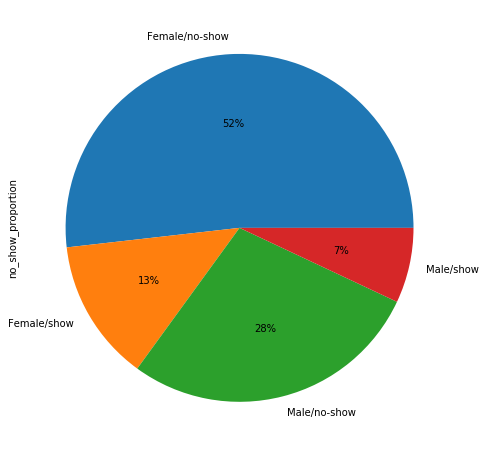

In [36]:
df2.plot(kind= 'pie', y= 'gender no-show', autopct='%.0f%%', figsize= (15,8))

## Conclusion
***
### Results:
Patients who scheduled appointments were more likely to show up when the appointment day was on the same day they scheduled the visit. From the data, young people between the ages of 11 and 40 who scheduled appointments were more likely to not show up. Howbeit, it was shown that alcoholics were more likely to not show up for their appointments while hipertensive patients were more likely to show up.
***
### Limitations:
 - Most of the data are categorical making it very hard to show strong correlations.
 - We do not have a lot of details  for certain factors to draw conclusion.
 - Inconsistent data in the age column.




## References
 - [Udacity's Introduction to Data Analysis](https://classroom.udacity.com/)
 - [Pandas Documentation](https://pandas.pydata.org/)
 - [How to use apply in pandas](https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/)
 - [How to use numpy where with multiple conditions](https://www.geeksforgeeks.org/how-to-use-numpy-where-with-multiple-conditions-in-python/)
 - [How to apply a function to a pandas dataframe](https://datascienceparichay.com/article/apply-a-function-to-a-pandas-dataframe/)
 - [How to apply function to multiple column in pandas userframe](https://medium.com/side-notes-4-data-science/crib-notes-how-to-apply-a-user-defined-function-to-multiple-columns-in-a-pandas-data-frame-ba00b99e13c3)